In [135]:
! pip install tensorflow-gpu

In [136]:
! pip install --upgrade pip

Requirement already up-to-date: pip in ./lib/python3.6/site-packages (18.0)


In [137]:
import tensorflow as tf
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))

In [138]:
! pip install keras

In [139]:
from tensorflow.python.client import device_lib

print(device_lib.list_local_devices())

#https://stackoverflow.com/questions/45662253/can-i-run-keras-model-on-gpu


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 3768918679041342595
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 15866508084
locality {
  bus_id: 1
  links {
  }
}
incarnation: 6330345008068236502
physical_device_desc: "device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:65:00.0, compute capability: 6.0"
]


In [140]:
! pip install opencv-python

In [141]:
import requests
from bs4 import BeautifulSoup
res = requests.get('https://www.google.com.tw/search?ei=WchSW_n6H4Gg-Qb815eQBA&yv=3&q=%E6%8A%BD%E7%85%99&safe=off&tbm=isch&vet=10ahUKEwi5i-DMvq_cAhUBUN4KHfzrBUIQuT0IuAEoAQ.WchSW_n6H4Gg-Qb815eQBA.i&ved=0ahUKEwi5i-DMvq_cAhUBUN4KHfzrBUIQuT0IuAEoAQ&ijn=3&start=300&asearch=ichunk&async=_id:rg_s,_pms:s,_fmt:pc')
soup = BeautifulSoup(res.text, 'lxml') #lxml解析器


In [142]:
#print(res.text)

In [143]:
import json
images = []
for rec in soup.select('.rg_meta'):
    jd = json.loads(rec.text)
    print(jd.get('tu'))
    images.append(jd.get('tu'))

https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT7wPgmOTUCSL5GUAw8qD6jkafmymEaqsUyklw_kgJNDewPijBT
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS54XDhyUT53U788iy1xrzXGsq3m4mM3UZ3gEuFJxtQ4BDqXp3U
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSov6sfKOltoz74tV7b61YRqUTD59BJnUK2Gt8xgL6DwFZWcrU5rQ
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQkRJ7ew27Ft51Qwo0ltVYFMF8RvEDViEfOF78SxepWXPyXVvq5
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQi6jPEHU5BYKseg_F9ADfsLgFs7YHYCTJmFrpMZTK1IwKG1m16
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSGX07DnTR95eF-bXCX7hX5ultt5wS7W_XoysAO84UOJVCc0UvX
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQIV2VAlVxiLp0aoXFl1YA9texKmg2SxUo8L6qMqwSajvzEH0lm
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTW0rgnBAiKAub7S7FdBeVhUjq6gmn6--SEj_El8U9QrVbsw6gQtQ
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQedLvFgmHAEe94ITclGm8sZjALuaea1WHW7ry70aCMZ7LPmhrREg
https://encrypted-tbn0.gstatic.com/images?q=tbn:A

In [144]:
len(images)

100

In [145]:
import os
import json, requests
from bs4 import BeautifulSoup
#抽煙
google_url = 'https://www.google.com.tw/search?ei=l0VYW77rAsPk-AaboofoDQ&safe=off&yv=3&q={}&tbm=isch&vet=10ahUKEwj-kvDe-rncAhVDMt4KHRvRAd0QuT0IuwEoAQ.l0VYW77rAsPk-AaboofoDQ.i&ved=0ahUKEwj-kvDe-rncAhVDMt4KHRvRAd0QuT0IuwEoAQ&ijn=1&start={}&asearch=ichunk&async=_id:rg_s,_pms:s,_fmt:pc'



def getImage(keyword, image_dir, batch):   
    
    if (os.path.exists('dataset')):
        print("dataset folder exists!")
    else:

        print(" not found for dateset folder ,Create it")
        os.mkdir('dataset')
        
        
    for ins in range(batch):
        res = requests.get(google_url.format(keyword, ins * 100))
        soup = BeautifulSoup(res.text, 'lxml') 
        
        if (os.path.exists('dataset/'+image_dir + str(ins))):
            
            print("File exists =", image_dir + str(ins))
        else:
  
            print("patch not found,Create it=", image_dir + str(ins))
            os.mkdir('dataset/'+image_dir + str(ins))
        
        for rec in soup.select('.rg_meta'):
            jd = json.loads(rec.text)
            url = jd.get('tu')
            with open('dataset/'+image_dir + str(ins) + '/' + url.split('tbn:')[1] + '.jpg', 'wb') as f:
                #print(image_dir + str(ins) + '/'url.split('tbn:')[1] + 'jpg')
                image_res = requests.get(url)
                f.write(image_res.content)               

In [146]:
#getImage('抽煙', 'smo', 10)

In [164]:

# Importing the Keras libraries and packages# Import 
from keras.models import Sequential 
from keras.layers import Conv2D
from keras.layers import MaxPooling2D 
from keras.layers import Flatten
from keras.layers import Dense

# Initialising the CNN
classifier = Sequential()

In [165]:
# 1. Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64,
3), activation = 'relu'))

In [166]:
# 2. Max Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [167]:
# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [168]:
# 3. Flattening
classifier.add(Flatten())

In [169]:
# 4. Fully Connection
classifier.add(Dense(units = 128, activation = 'relu')) 
classifier.add(Dense(units = 1, activation = 'sigmoid'))

In [177]:
# 5. optimizers
# original code
  
classifier.compile(optimizer = 'adam', loss ='binary_crossentropy', metrics = ['accuracy'])



In [178]:
from keras.preprocessing.image import ImageDataGenerator
#?ImageDataGenerator

In [179]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2, horizontal_flip = True)

In [180]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [181]:
training_set = train_datagen.flow_from_directory(
    'dataset/training_set', target_size = (64, 64),
     batch_size = 32,
     class_mode = 'binary')

Found 8000 images belonging to 2 classes.


In [182]:
test_set = test_datagen.flow_from_directory(
    'dataset/test_set', target_size = (64, 64),
    batch_size = 32, 
    class_mode = 'binary')

Found 2000 images belonging to 2 classes.


In [183]:
classifier.fit_generator(training_set, steps_per_epoch = 8000,
epochs = 3, validation_data = test_set, validation_steps = 2000)

Epoch 1/3
8000/8000 [==============================] - 734s 92ms/step - loss: nan - acc: 6.6406e-05 - val_loss: nan - val_acc: 0.0000e+00
Epoch 2/3
1353/8000 [====>.........................] - ETA: 9:46 - loss: nan - acc: 0.0000e+00

KeyboardInterrupt: 

### New code



In [2]:

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
from keras.callbacks import ModelCheckpoint


/home/aewin/work/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:

# dimensions of our images.
img_width, img_height = 150, 150

train_data_dir = 'dataset/training_set/smo'
validation_data_dir = 'dataset/test_set/smo'
nb_train_samples = 2000
nb_validation_samples = 300
epochs = 1
batch_size = 32

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

In [4]:

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))
#model.load_weights('weights.best.hdf5')
filepath='weights.best.hdf5'
model.compile(loss='binary_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])


In [5]:
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True,
                            mode='max')
callbacks_list = [checkpoint]

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)


# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1. / 255)


In [6]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')


Found 4299 images belonging to 2 classes.


In [7]:
validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')


Found 600 images belonging to 2 classes.


In [8]:

model.fit_generator(
    train_generator,
    #steps_per_epoch=nb_train_samples // batch_size,
    steps_per_epoch=nb_train_samples, 
    epochs=epochs,
    validation_data=validation_generator,
    #validation_steps=nb_validation_samples // batch_size,
    validation_steps=nb_validation_samples,
    callbacks=callbacks_list)



Epoch 1/1


InternalError: Failed to create session.

In [ ]:
model.save_weights('smorking.h5')


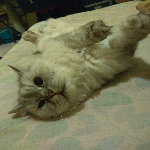

In [465]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('dataset/single_prediction/smo.jpg', target_size= (150,150))
test_image

In [466]:
test_image = image.img_to_array(test_image)

#test_image

In [467]:
type(test_image)

numpy.ndarray

In [468]:
test_image.shape

(150, 150, 3)

In [469]:
test_image = np.expand_dims(test_image, axis = 0)

In [470]:
a = np.array([[1,2,3],[4,5,6]])
a.shape

np.expand_dims(a, axis = 0)

array([[[1, 2, 3],
        [4, 5, 6]]])

In [471]:
result = model.predict_classes(test_image)


In [472]:
result

array([[0]], dtype=int32)